# Experimentation: Data Pre-Processing
---

In [1]:
# Import libraries
import sys
sys.path.append("..")

from monai.config import print_config
from src.preprocessing import get_transforms, get_datasets, get_dataloaders

import torch
import matplotlib.pyplot as plt

print_config()

# Set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

MONAI version: 1.4.dev2411
Numpy version: 1.26.3
Pytorch version: 2.2.1+cu121
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 5b5b22c0b7f86779189ac0dcffac6aab2032ea9f
MONAI __file__: c:\Users\<username>\anaconda3\envs\torch\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.11
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.2.1
scikit-image version: NOT INSTALLED or UNKNOWN VERSION.
scipy version: 1.12.0
Pillow version: 10.2.0
Tensorboard version: 2.16.2
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.17.1+cu121
tqdm version: NOT INSTALLED or UNKNOWN VERSION.
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.8
pandas version: 2.2.1
einops version: 0.7.0
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: 2.11.1
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about in

In [2]:
# Get transforms
transform = get_transforms()

# Get datasets
train_ds, val_ds = get_datasets(root_dir="../data", collection="HCC-TACE-Seg", transform=transform, download= False, val_frac=0.2)

# Get dataloaders
train_loader, val_loader = get_dataloaders(train_ds, val_ds, batch_size=1)

# Check length of datasets and dataloaders
print(train_ds.get_indices(), val_ds.get_indices())
print(len(train_loader), len(val_loader))

[ 43  68   3  74  82  75   6  86  84  79  63  97  90  71  53  27  18  59
  89  60  93 103   1  76  42  41   4  15  17  40  38   5  95  54   0  34
  28  55  50  11  35  23  52  10  31  78  57  80  91  32  94  14  73  19
  29  49 101 102  69  20  98  72  77  25  37  81  46  39  65  58  12  92
  88  70  87  36  21  83   9 100  67  64  47  44] [26 61  2 62 85 48 16 99 56 45 66 96 51 13  7 30 22 24 33  8]
84 20


In [33]:
# Sample a batch of data from the dataloader
batch = next(iter(train_loader))

# Separate the image and segmentation from the batch
image, seg = batch["image"], batch["seg"]

print(image.shape, seg.shape)

torch.Size([1, 512, 512, 192])
torch.Size([1, 1, 96, 96, 32]) torch.Size([1, 4, 96, 96, 32])


torch.Size([96, 32]) torch.Size([96, 32])


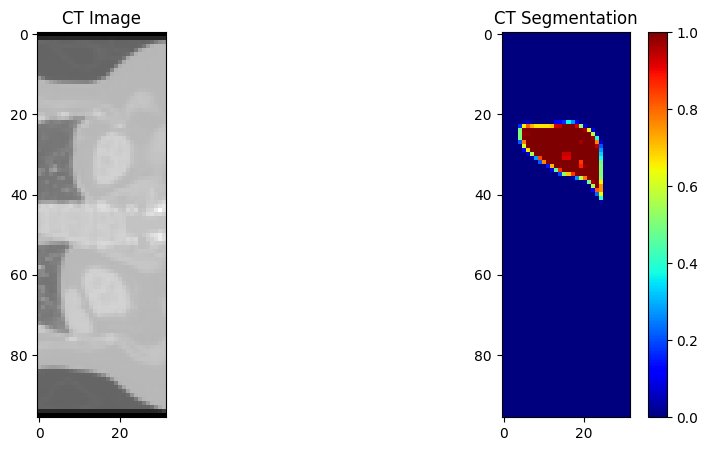

In [34]:
slice_idx =60
# Sample a slice from the image
CT_slice = image[0, 0,  :, slice_idx, :].cpu()

# Get the maximum segmentation class for each pixel in the slice
CT_seg_slice = seg[0,0, slice_idx,:,:].cpu()

print(CT_slice.shape, CT_seg_slice.shape)

# Plot the image and segmentation slice as a subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(CT_slice, cmap="gray")
axes[0].set_title("CT Image")
axes[1].imshow(CT_seg_slice, cmap="jet")
axes[1].set_title("CT Segmentation")
plt.colorbar(mappable=axes[1].imshow(CT_seg_slice, cmap='jet'), ax=axes[1])
plt.show()

In [ ]:
z = []
for batch in  enumerate(train_loader):
    z.append(batch[1]['image'].size()[4])

In [ ]:
plt.boxplot(z)

In [ ]:
max(z)